<a href="https://colab.research.google.com/github/gsankarvg/colab-projects/blob/main/Ghibli_Art.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install accelerate diffusers controlnet_aux

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 9.3 MB/s eta 0:00:00


In [ ]:
import torch
from controlnet_aux import CannyDetector
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
from diffusers.utils import load_image, make_image_grid

In [ ]:
controlnet = ControlNetModel.from_pretrained(
    "lllyasviel/sd-controlnet-canny",
    torch_dtype=torch.float16,
    varient = "fp16"
)

pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "Yntec/AbsoluteReality",
    controlnet=controlnet,
    torch_dtype=torch.float16
)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/transformers/models/clip/feature_extraction_clip.py:30: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


In [ ]:
pipe.load_ip_adapter("h94/IP-Adapter",
                     subfolder="models",
                     weight_name="ip-adapter_sd15.bin")

pipe.enable_model_cpu_offload()

In [ ]:
from google.colab import files
files.upload()
print("files uploaded.")

files uploaded.


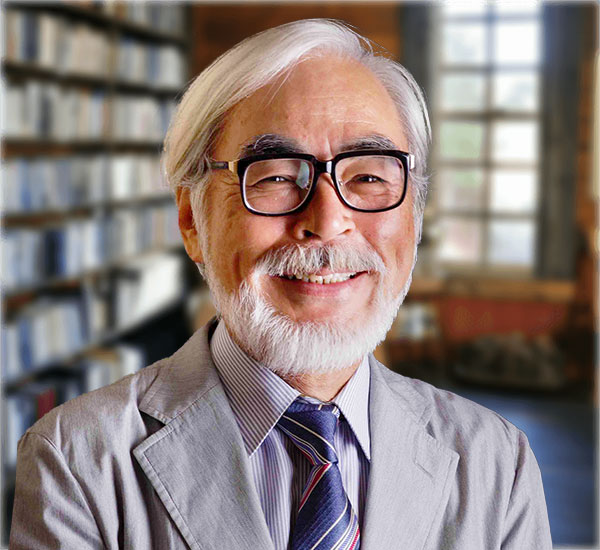

In [ ]:
img = load_image("2024-miyazaki-hayao.jpg")
img

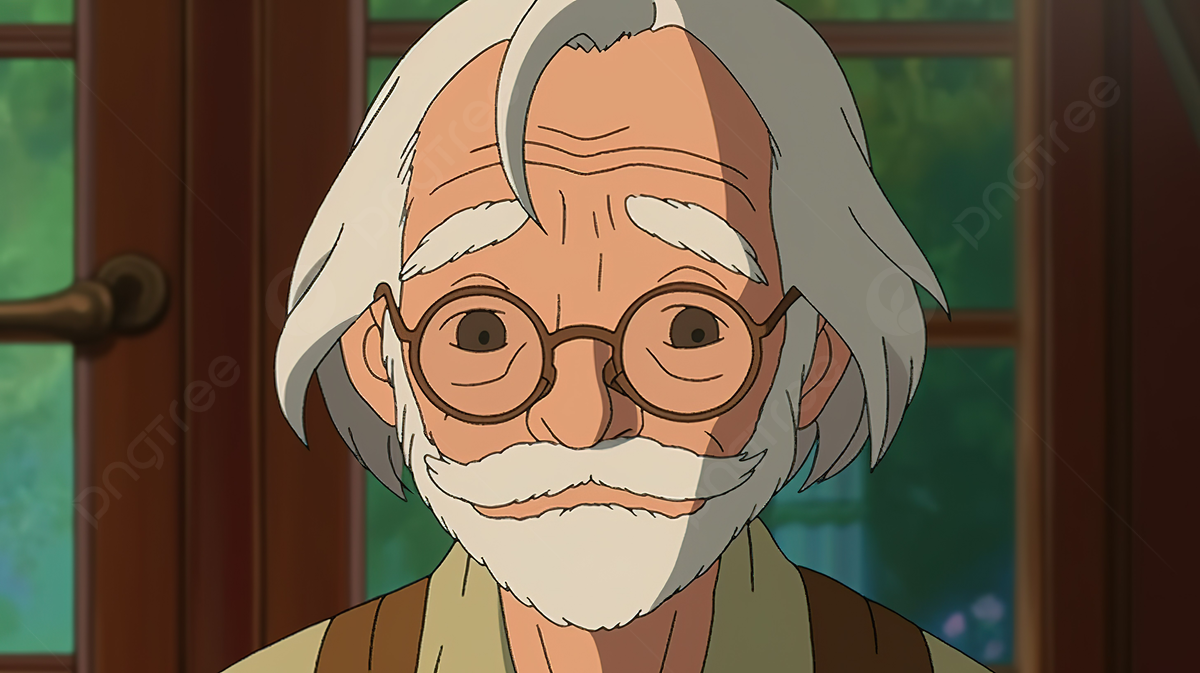

In [ ]:
ip_adap_img = load_image("style_input.jpg")
ip_adap_img

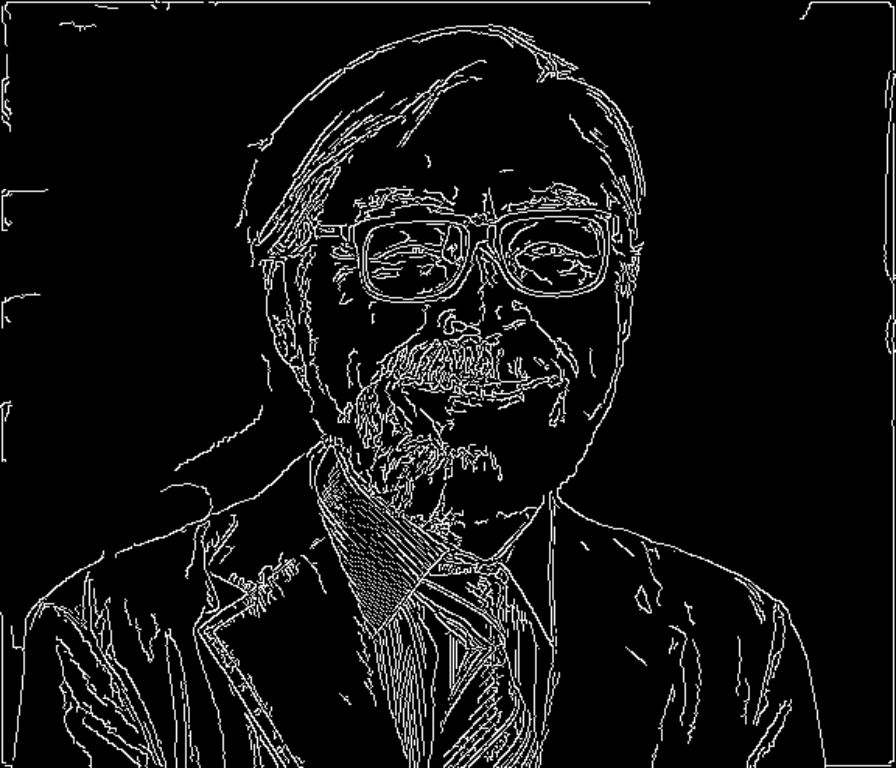

In [ ]:
canny = CannyDetector()
canny_img = canny(img,detect_resolution=512,image_resolution=768)
canny_img

In [ ]:
prompt = """
(photorealistic:1.2), raw, masterpiece, high quality, 8k, anime style, ghibli-like, white hair, white beard
"""

# 0.3 to 0.7 is a good range.

pipe.set_ip_adapter_scale(0.5)

images = pipe(prompt=prompt,
              negative_prompt="low quality",
              height=768,
              width=768,
              image=canny_img,
              ip_adapter_image=ip_adap_img,
              guidance_scale=6,
              controlnet_conditioning_scale=0.7,
              num_inference_steps=20,
              num_images_per_prompt=3,
              ).images

  0%|          | 0/20 [00:00<?, ?it/s]

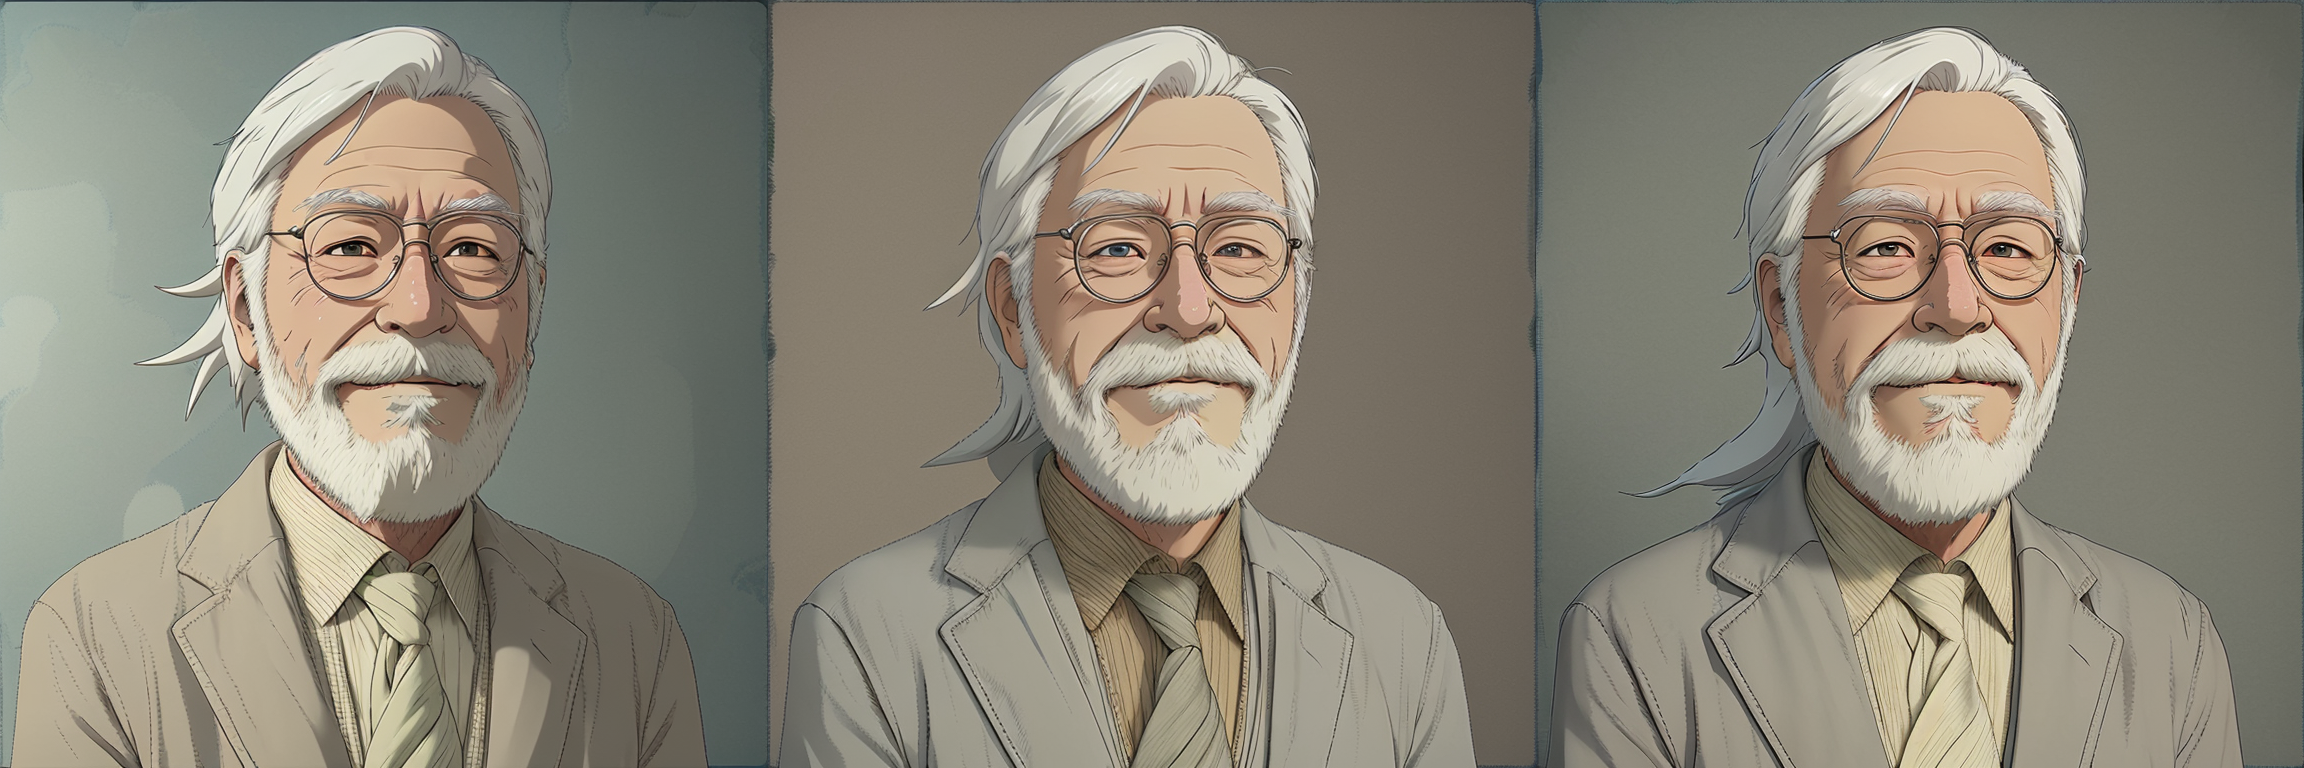

In [ ]:
make_image_grid(images,cols=3,rows=1)